https://data.cityofnewyork.us/Public-Safety/Motor-Vehicle-Collisions-Crashes/h9gi-nx95/data_preview


In [1]:
!python.exe -m pip install --upgrade pip

/bin/bash: line 1: python.exe: command not found


In [ ]:
!pip install plotly

#Front-end dependencies
!pip install dash

# Just to get a progress bar, not implemented
!sudo apt-get install -y aria2

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import plotly.express as px

In [3]:
# Do not click the links, the datasets are very very large
# About 3 minutes of runtime on desktop devices
crashes_url = 'https://data.cityofnewyork.us/api/views/h9gi-nx95/rows.csv?accessTypedownload'
persons_url = 'https://data.cityofnewyork.us/api/views/f55k-p6yu/rows.csv?accessType=download'

df_crashes = pd.read_csv(crashes_url,low_memory = False)
df_persons = pd.read_csv (persons_url,low_memory = False)

In [10]:
def title(s):
  print("="*60)
  print(s)
  print("="*60)

def findNulls(df):
  total = df.size
  nulls = df.isna().sum().sum()
  p = (nulls / total) * 100
  print(f"Percentage of null data in the following dataset = {p:.2f}%")

  return p

def getIndividualNulls(df):
  nulls = df.isna().sum()
  nulls = nulls[nulls>0]
  print(nulls.apply(lambda x: f"{x:,}"))
  return nulls

def removeDupes(df):
  print(f"Before removing duplicates: {df.shape}")
  df.drop_duplicates(inplace=True)
  print(f"After removing  duplicates: {df.shape}\n")
  return df

def cleanOutliers(df):
  numeric_cols = df.select_dtypes(include=[np.number]).columns
  mask = pd.Series(True, index=df.index)

  for column in numeric_cols:
    if column == 'COLLISION_ID':
      continue
    q1  = df[column].quantile(0.25)
    q3  = df[column].quantile(0.75)
    iqr = q3-q1
    lower = q1-1.5*iqr
    upper = q3+1.5*iqr
    mask &= df[column].between(lower,upper)|df[column].isna()

  return df[mask]

def outlierComparison(df):
  print("before Outliers:")
  temp = findNulls(df)
  print("\nAfter Outliers")
  cleanOutliers(df)
  diff = temp-findNulls(df)

  if diff>0:
    print(f"Percentage of nulls decreased by = {diff:.8f}%")
  else:
    print("no outliers... for some reason")

  return df

def datasetOverview(df):
  print(f"Size: {df.size:,}")
  print(f"Shape: {df.shape}")
  print(f"Columns: {df.columns}")

  getIndividualNulls(df)

  total = df.size
  nulls = df.isna().sum().sum()
  p = (nulls / total) * 100
  print(f"Percentage of null data = {p:.4f}%\n")

def cleanData(df):
  df = removeDupes(df)
  df = outlierComparison(df)
  return df

In [11]:
title("Crashes - Data Overview")
datasetOverview(df_crashes)

title("Persons - Data Overview")
datasetOverview(df_persons)

Crashes - Data Overview
Size: 64,340,299
Shape: (2218631, 29)
Columns: Index(['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME',
       'OFF STREET NAME', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'],
      dtype='object')
BOROUGH                            679,907
ZIP CODE                           680,182
LATITUDE                           240,341
LONGITUDE           

In [12]:
title("Crashes - Data Cleaning")
df_crashes=cleanData(df_crashes)

title("Persons - Data Cleaning")
df_persons=cleanData(df_persons)

Crashes - Data Cleaning
Before removing duplicates: (2218631, 29)
After removing  duplicates: (2218631, 29)

before Outliers:
Percentage of null data in the following dataset = 29.48%

After Outliers
Percentage of null data in the following dataset = 29.48%
no outliers... for some reason
Persons - Data Cleaning
Before removing duplicates: (5813820, 21)
After removing  duplicates: (5813820, 21)

before Outliers:
Percentage of null data in the following dataset = 33.94%

After Outliers
Percentage of null data in the following dataset = 33.94%
no outliers... for some reason


In [13]:
df_merged = pd.merge(df_crashes, df_persons, on="COLLISION_ID", how="inner")
title("Merged - Data Overview")
datasetOverview(df_merged)

Merged - Data Overview
Size: 284,877,180
Shape: (5813820, 49)
Columns: Index(['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME',
       'OFF STREET NAME', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5',
       'UNIQUE_ID', 'CRASH_DATE', 'CRASH_TIME', 'PERSON_ID', 'PERSON_TYPE',
       'PERSON_INJURY', 'VEHICLE_ID', 'PERSON_AGE', 'EJECTION',
       'EMOTIONAL_STATUS', 'BODI

In [14]:
df_merged=cleanData(df_merged)

Before removing duplicates: (5813820, 49)
After removing  duplicates: (5813820, 49)

before Outliers:
Percentage of null data in the following dataset = 31.77%

After Outliers
Percentage of null data in the following dataset = 31.77%
no outliers... for some reason


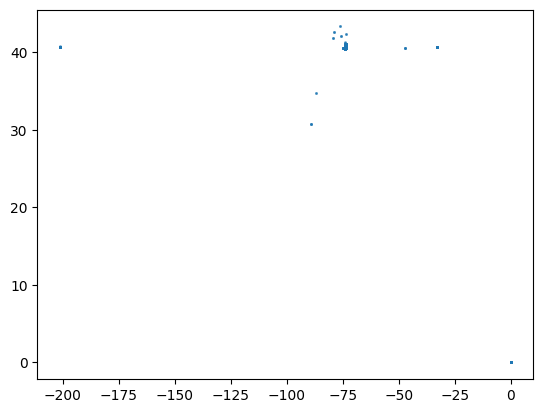

In [15]:
plt.scatter(df_merged['LONGITUDE'], df_merged['LATITUDE'], s=1, alpha=0.3)
plt.show()

In [ ]:
#Front end